In [2]:
import cv2
import mediapipe as mp
mp_pose = mp.solutions.pose
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import imutils
import tensorflow as tf
from tensorflow import keras
from keras import layers



In [3]:
folder_path = "C:/Users/chengyang/Physio_2.0/archive_1/archive_1"

In [12]:
# split the files into train and test for each subfolder
def split_train_test(origin, test_size=0.2):
    for folder in os.listdir(origin):
        print(folder)
        folder_path = os.path.join(origin, folder)
        print(folder_path)
        if os.path.isdir(folder_path):
            files = os.listdir(folder_path)
            files = [os.path.join(folder_path, f) for f in files if f.endswith('.jpg')]
            np.random.shuffle(files)
            split_index = int(len(files) * test_size)
            test_files = files[:split_index]
            train_files = files[split_index:]
            print(test_files)

            # put all test files into a test folder
            test_folder = os.path.join(folder_path, 'test')
            print(test_folder)
            if not os.path.exists(test_folder):
                os.mkdir(test_folder)
            for f in test_files:
                os.rename(f, os.path.join(test_folder, os.path.basename(f)))

            train_folder = os.path.join(folder_path, 'train')
            print(train_folder)
            if not os.path.exists(train_folder):
                os.mkdir(train_folder)
            for f in train_files:
                os.rename(f, os.path.join(train_folder, os.path.basename(f)))

split_train_test(folder_path)


barbell biceps curl
C:/Users/AnChengYang/Downloads/archive_1\barbell biceps curl
[]
C:/Users/AnChengYang/Downloads/archive_1\barbell biceps curl\test
C:/Users/AnChengYang/Downloads/archive_1\barbell biceps curl\train
bench press
C:/Users/AnChengYang/Downloads/archive_1\bench press
['C:/Users/AnChengYang/Downloads/archive_1\\bench press\\bench press_1500041.jpg', 'C:/Users/AnChengYang/Downloads/archive_1\\bench press\\bench press_700061.jpg', 'C:/Users/AnChengYang/Downloads/archive_1\\bench press\\bench press_6100051.jpg', 'C:/Users/AnChengYang/Downloads/archive_1\\bench press\\bench press_800001.jpg', 'C:/Users/AnChengYang/Downloads/archive_1\\bench press\\bench press_3700191.jpg', 'C:/Users/AnChengYang/Downloads/archive_1\\bench press\\bench press_3700141.jpg', 'C:/Users/AnChengYang/Downloads/archive_1\\bench press\\bench press_5900031.jpg', 'C:/Users/AnChengYang/Downloads/archive_1\\bench press\\bench press_3900071.jpg', 'C:/Users/AnChengYang/Downloads/archive_1\\bench press\\bench p

In [28]:
# create new folders in "C:/Users/AnChengYang/Downloads/archive_1/train"
origin = "C:/Users/AnChengYang/Downloads/archive_1"
for folder in os.listdir(origin):
    new_test_folder_path = os.path.join(origin, 'test', folder)
    print(new_test_folder_path)
    if not os.path.exists(new_test_folder_path):
        os.mkdir(new_test_folder_path)

    new_train_folder_path = os.path.join(origin, 'train', folder)
    print(new_train_folder_path)
    if not os.path.exists(new_train_folder_path):
        os.mkdir(new_train_folder_path)

C:/Users/AnChengYang/Downloads/archive_1\test\barbell biceps curl
C:/Users/AnChengYang/Downloads/archive_1\train\barbell biceps curl
C:/Users/AnChengYang/Downloads/archive_1\test\bench press
C:/Users/AnChengYang/Downloads/archive_1\train\bench press
C:/Users/AnChengYang/Downloads/archive_1\test\chest fly machine
C:/Users/AnChengYang/Downloads/archive_1\train\chest fly machine
C:/Users/AnChengYang/Downloads/archive_1\test\deadlift
C:/Users/AnChengYang/Downloads/archive_1\train\deadlift
C:/Users/AnChengYang/Downloads/archive_1\test\decline bench press
C:/Users/AnChengYang/Downloads/archive_1\train\decline bench press
C:/Users/AnChengYang/Downloads/archive_1\test\hammer curl
C:/Users/AnChengYang/Downloads/archive_1\train\hammer curl
C:/Users/AnChengYang/Downloads/archive_1\test\hip thrust
C:/Users/AnChengYang/Downloads/archive_1\train\hip thrust
C:/Users/AnChengYang/Downloads/archive_1\test\incline bench press
C:/Users/AnChengYang/Downloads/archive_1\train\incline bench press
C:/Users/AnC

In [35]:
for folder in os.listdir("C:/Users/AnChengYang/Downloads/archive_1"):
    folder_path = os.path.join("C:/Users/AnChengYang/Downloads/archive_1", folder)
    for data_folder in os.listdir(folder_path):
        print(data_folder)
        data_folder_path = os.path.join(folder_path, data_folder)
        print(data_folder_path)
        if data_folder == "test":
            files = os.listdir(data_folder_path)
            files = [os.path.join(data_folder_path, f) for f in files if f.endswith('.jpg')]
            print(files)
            for f in files:
                os.rename(f, os.path.join("C:/Users/AnChengYang/Downloads/archive_1/test", folder, os.path.basename(f)))
        if data_folder == "train":
            files = os.listdir(data_folder_path)
            files = [os.path.join(data_folder_path, f) for f in files if f.endswith('.jpg')]
            print(files)
            for f in files:
                os.rename(f, os.path.join("C:/Users/AnChengYang/Downloads/archive_1/train", folder, os.path.basename(f)))

test
C:/Users/AnChengYang/Downloads/archive_1\barbell biceps curl\test
[]
train
C:/Users/AnChengYang/Downloads/archive_1\barbell biceps curl\train
['C:/Users/AnChengYang/Downloads/archive_1\\barbell biceps curl\\train\\barbell biceps curl_100001.jpg', 'C:/Users/AnChengYang/Downloads/archive_1\\barbell biceps curl\\train\\barbell biceps curl_1000011.jpg', 'C:/Users/AnChengYang/Downloads/archive_1\\barbell biceps curl\\train\\barbell biceps curl_1000051.jpg', 'C:/Users/AnChengYang/Downloads/archive_1\\barbell biceps curl\\train\\barbell biceps curl_100021.jpg', 'C:/Users/AnChengYang/Downloads/archive_1\\barbell biceps curl\\train\\barbell biceps curl_100081.jpg', 'C:/Users/AnChengYang/Downloads/archive_1\\barbell biceps curl\\train\\barbell biceps curl_100091.jpg', 'C:/Users/AnChengYang/Downloads/archive_1\\barbell biceps curl\\train\\barbell biceps curl_100101.jpg', 'C:/Users/AnChengYang/Downloads/archive_1\\barbell biceps curl\\train\\barbell biceps curl_1100011.jpg', 'C:/Users/AnCheng

In [5]:
train_points = []
train_labels = []
test_points = []
test_labels = []
class_map = {}
classes = ["squat", "push up", "plank", "russian twist"]


# Prepare the gallery folder and image file list
train_image_folder_name = "C:/Users/chengyang/Physio_2.0/archive_1/archive_1/train"
train_image_file_list = []
train_image_class_list = sorted(os.listdir(train_image_folder_name))
train_image_class_list = [f for f in train_image_class_list if f in classes]
train_image_class_list = [f for f in train_image_class_list if f in classes]

for i, subfolder in enumerate(train_image_class_list):
    if subfolder not in classes:
        continue
    file_list = sorted(os.listdir(train_image_folder_name + "/" + subfolder))
    for file in file_list:
        train_image_file_list.append(train_image_folder_name + "/" + subfolder + "/" + file)
        train_labels.append(i)
        class_map[i] = subfolder

print("Train Gallery: %d classes, %d images" % (len(train_image_class_list), len(train_image_file_list)))

# Prepare the gallery folder and image file list
test_image_folder_name = "C:/Users/chengyang/Physio_2.0/archive_1/archive_1/test"
test_image_file_list = []
test_image_class_list = sorted(os.listdir(test_image_folder_name))
test_image_class_list = [f for f in test_image_class_list if f in classes]

for i, subfolder in enumerate(test_image_class_list):
    if subfolder not in classes:
        continue
    file_list = sorted(os.listdir(test_image_folder_name + "/" + subfolder))
    for file in file_list:
        test_image_file_list.append(test_image_folder_name + "/" + subfolder + "/" + file)
        test_labels.append(i)

print("Test Gallery: %d classes, %d images" % (len(test_image_class_list), len(test_image_file_list)))
print(class_map)



Train Gallery: 4 classes, 2288 images
Test Gallery: 4 classes, 570 images
{0: 'plank', 1: 'push up', 2: 'russian twist', 3: 'squat'}


In [6]:
train_image_file_list

['C:/Users/chengyang/Physio_2.0/archive_1/archive_1/train/plank/plank_100001.jpg',
 'C:/Users/chengyang/Physio_2.0/archive_1/archive_1/train/plank/plank_100011.jpg',
 'C:/Users/chengyang/Physio_2.0/archive_1/archive_1/train/plank/plank_100021.jpg',
 'C:/Users/chengyang/Physio_2.0/archive_1/archive_1/train/plank/plank_100031.jpg',
 'C:/Users/chengyang/Physio_2.0/archive_1/archive_1/train/plank/plank_100041.jpg',
 'C:/Users/chengyang/Physio_2.0/archive_1/archive_1/train/plank/plank_100051.jpg',
 'C:/Users/chengyang/Physio_2.0/archive_1/archive_1/train/plank/plank_100071.jpg',
 'C:/Users/chengyang/Physio_2.0/archive_1/archive_1/train/plank/plank_100081.jpg',
 'C:/Users/chengyang/Physio_2.0/archive_1/archive_1/train/plank/plank_100091.jpg',
 'C:/Users/chengyang/Physio_2.0/archive_1/archive_1/train/plank/plank_100101.jpg',
 'C:/Users/chengyang/Physio_2.0/archive_1/archive_1/train/plank/plank_100111.jpg',
 'C:/Users/chengyang/Physio_2.0/archive_1/archive_1/train/plank/plank_100121.jpg',
 'C:

In [7]:
test_image_file_list

['C:/Users/chengyang/Physio_2.0/archive_1/archive_1/test/plank/plank_100061.jpg',
 'C:/Users/chengyang/Physio_2.0/archive_1/archive_1/test/plank/plank_100131.jpg',
 'C:/Users/chengyang/Physio_2.0/archive_1/archive_1/test/plank/plank_100241.jpg',
 'C:/Users/chengyang/Physio_2.0/archive_1/archive_1/test/plank/plank_100301.jpg',
 'C:/Users/chengyang/Physio_2.0/archive_1/archive_1/test/plank/plank_100341.jpg',
 'C:/Users/chengyang/Physio_2.0/archive_1/archive_1/test/plank/plank_100351.jpg',
 'C:/Users/chengyang/Physio_2.0/archive_1/archive_1/test/plank/plank_100441.jpg',
 'C:/Users/chengyang/Physio_2.0/archive_1/archive_1/test/plank/plank_100491.jpg',
 'C:/Users/chengyang/Physio_2.0/archive_1/archive_1/test/plank/plank_100501.jpg',
 'C:/Users/chengyang/Physio_2.0/archive_1/archive_1/test/plank/plank_100521.jpg',
 'C:/Users/chengyang/Physio_2.0/archive_1/archive_1/test/plank/plank_100571.jpg',
 'C:/Users/chengyang/Physio_2.0/archive_1/archive_1/test/plank/plank_100601.jpg',
 'C:/Users/cheng

In [8]:
classes = ["squat", "push up", "plank", "russian twist"]

# filter images that have classes are in images
class_train_image_file_list = [f for f in train_image_file_list if f.split("/")[-2] in classes]
class_test_image_file_list = [f for f in test_image_file_list if f.split("/")[-2] in classes]

In [35]:
for item in class_train_image_file_list:
    print(item)
    frame = cv2.imread(item)

    # Extract keypoints from each input file and append to pre-generated list of points
    with mp_pose.Pose(
        static_image_mode=True, min_detection_confidence=0.5, model_complexity=1) as pose:

        # Recolour image to RGB for processing
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False

        # Pose detection using model
        results = pose.process(image)

        try:
            landmarks_3d = results.pose_world_landmarks.landmark

            landmark_list = []
            for lm in np.arange(0,33):
                landmark_list.append([landmarks_3d[lm].x, landmarks_3d[lm].y,landmarks_3d[lm].z])

            train_points.append(np.array(landmark_list))
        except:
            train_points.append(["nil"])

C:/Users/AnChengYang/Downloads/archive_1/train/plank/plank_100001.jpg
C:/Users/AnChengYang/Downloads/archive_1/train/plank/plank_100011.jpg
C:/Users/AnChengYang/Downloads/archive_1/train/plank/plank_100021.jpg
C:/Users/AnChengYang/Downloads/archive_1/train/plank/plank_100031.jpg
C:/Users/AnChengYang/Downloads/archive_1/train/plank/plank_100041.jpg
C:/Users/AnChengYang/Downloads/archive_1/train/plank/plank_100051.jpg
C:/Users/AnChengYang/Downloads/archive_1/train/plank/plank_100071.jpg
C:/Users/AnChengYang/Downloads/archive_1/train/plank/plank_100081.jpg
C:/Users/AnChengYang/Downloads/archive_1/train/plank/plank_100091.jpg
C:/Users/AnChengYang/Downloads/archive_1/train/plank/plank_100101.jpg
C:/Users/AnChengYang/Downloads/archive_1/train/plank/plank_100111.jpg
C:/Users/AnChengYang/Downloads/archive_1/train/plank/plank_100121.jpg
C:/Users/AnChengYang/Downloads/archive_1/train/plank/plank_100141.jpg
C:/Users/AnChengYang/Downloads/archive_1/train/plank/plank_100151.jpg
C:/Users/AnChengYang

KeyboardInterrupt: 

In [9]:
train_points

[]

In [25]:
for item in class_test_image_file_list:
    print(item)
    frame = cv2.imread(item)

    # Extract keypoints from each input file and append to pre-generated list of points
    with mp_pose.Pose(
        static_image_mode=True, min_detection_confidence=0.5, model_complexity=1) as pose:

        # Recolour image to RGB for processing
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False

        # Pose detection using model
        results = pose.process(image)

        try:
            landmarks_3d = results.pose_world_landmarks.landmark

            landmark_list = []
            for lm in np.arange(0,33):
                landmark_list.append([landmarks_3d[lm].x, landmarks_3d[lm].y,landmarks_3d[lm].z])

            test_points.append(np.array(landmark_list))
        except:
            test_points.append(["nil"])

C:/Users/AnChengYang/Downloads/archive_1/test/plank/plank_100061.jpg
C:/Users/AnChengYang/Downloads/archive_1/test/plank/plank_100131.jpg
C:/Users/AnChengYang/Downloads/archive_1/test/plank/plank_100241.jpg
C:/Users/AnChengYang/Downloads/archive_1/test/plank/plank_100301.jpg
C:/Users/AnChengYang/Downloads/archive_1/test/plank/plank_100341.jpg
C:/Users/AnChengYang/Downloads/archive_1/test/plank/plank_100351.jpg
C:/Users/AnChengYang/Downloads/archive_1/test/plank/plank_100441.jpg
C:/Users/AnChengYang/Downloads/archive_1/test/plank/plank_100491.jpg
C:/Users/AnChengYang/Downloads/archive_1/test/plank/plank_100501.jpg
C:/Users/AnChengYang/Downloads/archive_1/test/plank/plank_100521.jpg
C:/Users/AnChengYang/Downloads/archive_1/test/plank/plank_100571.jpg
C:/Users/AnChengYang/Downloads/archive_1/test/plank/plank_100601.jpg
C:/Users/AnChengYang/Downloads/archive_1/test/plank/plank_100631.jpg
C:/Users/AnChengYang/Downloads/archive_1/test/plank/plank_100681.jpg
C:/Users/AnChengYang/Downloads/arc

In [26]:
import csv
import numpy as np

# ... (your existing code)

# Save train_points to a CSV file
def save_points(train_points, filename):
    with open(filename, 'w', newline='') as csvfile:
        csv_writer = csv.writer(csvfile)

        # Write a header if needed (assuming all arrays have the same length)
        header = []
        for i in range(33):
            x_i = f'x{i}'
            y_i = f'y{i}'
            z_i = f'z{i}'
            header.extend([x_i, y_i, z_i])  # Assuming each array has 33 elements (adjust accordingly)
        csv_writer.writerow(header)

        # Write each row (NumPy array) to the CSV file
        for train_point in train_points:
            if not np.array_equal(train_point, np.array(["nil"] * len(train_point))):
                csv_writer.writerow(train_point.flatten())
            else:
                csv_writer.writerow(["nil"] * len(header))

    # Print a message indicating successful save
    print(f"train_points saved to {filename}")

save_points(train_points, "C:/Users/AnChengYang/PoseEstimation/MP_PN/train_points.csv")
save_points(test_points, "C:/Users/AnChengYang/PoseEstimation/MP_PN/test_points.csv")

train_points saved to C:/Users/AnChengYang/PoseEstimation/MP_PN/train_points.csv
train_points saved to C:/Users/AnChengYang/PoseEstimation/MP_PN/test_points.csv


In [12]:
import csv
import numpy as np

def get_train_points(filename):
    # Load train_points from the CSV file
    loaded_train_points = []

    with open(filename, 'r') as csvfile:
        csv_reader = csv.reader(csvfile)
        header = next(csv_reader)  # Skip the header row if it exists

        for row in csv_reader:
            if row != ["nil"] * len(header):
                loaded_train_points.append(np.array(row, dtype=float).reshape(-1, 3))
            else:
                # loaded_train_points.append(["nil"])
                loaded_train_points.append(np.array([0] * len(header), dtype=float).reshape(-1, 3))
    
    return loaded_train_points
loaded_train_points = get_train_points("C:/Users/chengyang/Physio_2.0/PoseEstimation/PoseEstimation/MP_PN/train_points.csv")
loaded_train_points

[array([[-5.63468397e-01,  2.29011148e-01,  9.17437971e-02],
        [-5.89726806e-01,  2.43755549e-01,  5.84585778e-02],
        [-5.89985490e-01,  2.43523642e-01,  5.91031983e-02],
        [-5.90361297e-01,  2.44332790e-01,  5.92225716e-02],
        [-5.96396029e-01,  2.28513509e-01,  8.82667452e-02],
        [-5.97619295e-01,  2.28093818e-01,  8.76594782e-02],
        [-5.98772883e-01,  2.29135752e-01,  8.83826911e-02],
        [-5.80625951e-01,  1.83946490e-01, -3.19306850e-02],
        [-6.20680809e-01,  1.33967116e-01,  8.86964649e-02],
        [-5.46712041e-01,  1.92073300e-01,  6.63574338e-02],
        [-5.55913866e-01,  1.78635240e-01,  1.00984402e-01],
        [-4.54262674e-01,  1.53341606e-01, -8.03020671e-02],
        [-4.94949430e-01, -2.14603096e-02,  1.67043731e-01],
        [-3.94153118e-01,  4.03420508e-01, -3.82174328e-02],
        [-4.46692795e-01,  1.19305491e-01,  3.15009654e-01],
        [-6.03445530e-01,  4.20750856e-01,  9.79509726e-02],
        [-5.98750174e-01

In [13]:
loaded_test_points = get_train_points("C:/Users/chengyang/Physio_2.0/PoseEstimation/PoseEstimation/MP_PN/test_points.csv")
loaded_test_points

[array([[-0.57478189,  0.17922418,  0.12624945],
        [-0.60118568,  0.1906286 ,  0.09664854],
        [-0.60151559,  0.19043617,  0.09716678],
        [-0.60183275,  0.19124129,  0.09733513],
        [-0.60193104,  0.17436513,  0.12669472],
        [-0.60311091,  0.1740822 ,  0.1259829 ],
        [-0.60432345,  0.17481035,  0.12701701],
        [-0.5961622 ,  0.13607955,  0.00454193],
        [-0.61519277,  0.07926239,  0.12508492],
        [-0.56019449,  0.14685254,  0.0982618 ],
        [-0.56336904,  0.13130826,  0.1331258 ],
        [-0.48668459,  0.13191788, -0.05842147],
        [-0.48095798, -0.05997751,  0.18814912],
        [-0.44341749,  0.37638265, -0.01765431],
        [-0.43818262,  0.08856254,  0.32709193],
        [-0.62574857,  0.36853647,  0.11328254],
        [-0.60056227,  0.22690788,  0.41199255],
        [-0.67951453,  0.35984284,  0.11682535],
        [-0.66046596,  0.23102799,  0.43553847],
        [-0.6748634 ,  0.30680698,  0.1129937 ],
        [-0.66753852

In [14]:
for i in loaded_train_points:
    print(len(i))

33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
3

In [15]:
loaded_test_points

[array([[-0.57478189,  0.17922418,  0.12624945],
        [-0.60118568,  0.1906286 ,  0.09664854],
        [-0.60151559,  0.19043617,  0.09716678],
        [-0.60183275,  0.19124129,  0.09733513],
        [-0.60193104,  0.17436513,  0.12669472],
        [-0.60311091,  0.1740822 ,  0.1259829 ],
        [-0.60432345,  0.17481035,  0.12701701],
        [-0.5961622 ,  0.13607955,  0.00454193],
        [-0.61519277,  0.07926239,  0.12508492],
        [-0.56019449,  0.14685254,  0.0982618 ],
        [-0.56336904,  0.13130826,  0.1331258 ],
        [-0.48668459,  0.13191788, -0.05842147],
        [-0.48095798, -0.05997751,  0.18814912],
        [-0.44341749,  0.37638265, -0.01765431],
        [-0.43818262,  0.08856254,  0.32709193],
        [-0.62574857,  0.36853647,  0.11328254],
        [-0.60056227,  0.22690788,  0.41199255],
        [-0.67951453,  0.35984284,  0.11682535],
        [-0.66046596,  0.23102799,  0.43553847],
        [-0.6748634 ,  0.30680698,  0.1129937 ],
        [-0.66753852

In [16]:
np.array_equal(loaded_train_points, train_points)

False

In [40]:
print(train_labels)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [18]:
NUM_CLASSES = 4 # Specify number of classes as required by your application
BATCH_SIZE = 128 # Specify batch size for training

def augment(points, label):
    # jitter points
    points += tf.random.uniform(points.shape, -0.005, 0.005, dtype=tf.float64)
    # shuffle points
    points = tf.random.shuffle(points, seed=42)
    return points, label

test_labels_onehot = np.array(pd.get_dummies(test_labels))
train_labels_onehot = np.array(pd.get_dummies(train_labels))

train_dataset = tf.data.Dataset.from_tensor_slices((loaded_train_points, train_labels_onehot))
test_dataset = tf.data.Dataset.from_tensor_slices((loaded_test_points, test_labels_onehot))

train_dataset = train_dataset.shuffle(len(loaded_train_points), seed=42).map(augment).batch(BATCH_SIZE)
test_dataset = test_dataset.shuffle(len(loaded_test_points), seed=42).batch(BATCH_SIZE)

array([[ True, False, False, False],
       [ True, False, False, False],
       [ True, False, False, False],
       ...,
       [False, False, False,  True],
       [False, False, False,  True],
       [False, False, False,  True]])

In [19]:
# Convolution and dense layers of the T-net
def conv_bn(x, filters):
    x = layers.Conv1D(filters, kernel_size=1, padding="valid")(x)
    x = layers.BatchNormalization(momentum=0.0)(x)
    return layers.Activation("relu")(x)

def dense_bn(x, filters):
    x = layers.Dense(filters)(x)
    x = layers.BatchNormalization(momentum=0.0)(x)
    return layers.Activation("relu")(x)

# Regularizer function for MLP
class OrthogonalRegularizer(keras.regularizers.Regularizer):
    def __init__(self, num_features, l2reg=0.001):
        self.num_features = num_features
        self.l2reg = l2reg
        self.eye = tf.eye(num_features)

    def __call__(self, x):
        x = tf.reshape(x, (-1, self.num_features, self.num_features))
        xxt = tf.tensordot(x, x, axes=(2, 2))
        xxt = tf.reshape(xxt, (-1, self.num_features, self.num_features))
        summ = self.l2reg * tf.square(xxt - self.eye)
        return tf.reduce_sum(summ)
    
    # def get_config(self):
    #     return {'weight': self.weight}


In [20]:
# T-net layers for pointnet
def tnet(inputs, num_features):

    # Initalise bias as the indentity matrix
    bias = keras.initializers.Constant(np.eye(num_features).flatten())
    reg = OrthogonalRegularizer(num_features)

    x = conv_bn(inputs, 32)
    x = conv_bn(x, 64)
    x = conv_bn(x, 512)
    x = layers.GlobalMaxPooling1D()(x)
    x = dense_bn(x, 256)
    x = dense_bn(x, 128)
    x = layers.Dense(
            num_features * num_features,
            kernel_initializer="zeros",
            bias_initializer=bias,
            activity_regularizer=reg,
        )(x)
    feat_T = layers.Reshape((num_features, num_features))(x)
    # Apply affine transformation to input features
    return layers.Dot(axes=(2, 1))([inputs, feat_T])


In [21]:
inputs = keras.Input(shape=(33,3))

x = tnet(inputs, 3)
x = conv_bn(x,32)
x = conv_bn(x,32)
x = tnet(x,32)
x = conv_bn(x,32)
x = conv_bn(x,64)
x = conv_bn(x,512)
x = layers.GlobalMaxPooling1D()(x)
x = dense_bn(x,256)
x = layers.Dropout(0.3)(x)
x = dense_bn(x, 128)
x = layers.Dropout(0.3)(x)

outputs = layers.Dense(NUM_CLASSES, activation ="softmax")(x)

model = keras.Model(inputs=inputs, outputs=outputs, name="pointnet")
model.summary()



Model: "pointnet"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 33, 3)]              0         []                            
                                                                                                  
 conv1d (Conv1D)             (None, 33, 32)               128       ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 33, 32)               128       ['conv1d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     (None, 33, 32)               0         ['batch_normalization

In [45]:
model.compile(
    loss="categorical_crossentropy",
    optimizer=keras.optimizers.Adam(learning_rate=0.0005),
    metrics=["accuracy"] 
)
checkpoint_path = "training_1/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

# Create a callback that saves the model's weights
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)

model.fit(train_dataset, epochs=25, validation_data=test_dataset, callbacks=[cp_callback])

Epoch 1/25
18/18 [==============================] - ETA: 0s - loss: 6.8846 - accuracy: 0.7277
Epoch 1: saving model to training_1\cp.ckpt
18/18 [==============================] - 29s 383ms/step - loss: 6.8846 - accuracy: 0.7277 - val_loss: 4.6432 - val_accuracy: 0.9246
Epoch 2/25
18/18 [==============================] - ETA: 0s - loss: 4.6658 - accuracy: 0.9240
Epoch 2: saving model to training_1\cp.ckpt
18/18 [==============================] - 5s 259ms/step - loss: 4.6658 - accuracy: 0.9240 - val_loss: 4.2954 - val_accuracy: 0.9263
Epoch 3/25
18/18 [==============================] - ETA: 0s - loss: 4.4512 - accuracy: 0.9432
Epoch 3: saving model to training_1\cp.ckpt
18/18 [==============================] - 4s 229ms/step - loss: 4.4512 - accuracy: 0.9432 - val_loss: 4.1909 - val_accuracy: 0.9421
Epoch 4/25
18/18 [==============================] - ETA: 0s - loss: 4.3924 - accuracy: 0.9563
Epoch 4: saving model to training_1\cp.ckpt
18/18 [==============================] - 4s 226ms/step

In [23]:
# model.save("model.h5")

# loaded_model = tf.keras.models.load_model("model.h5")
checkpoint_path = "training_1/cp.ckpt"
loaded_model = keras.Model(inputs=inputs, outputs=outputs, name="pointnet")

loaded_model.load_weights(checkpoint_path)


tf.Tensor(
[[False False False  True]
 [False False False  True]
 [ True False False False]
 [ True False False False]
 [ True False False False]
 [False  True False False]
 [ True False False False]
 [False False  True False]], shape=(8, 4), dtype=bool)
0    3
1    3
2    0
3    0
4    0
5    1
6    0
7    2
dtype: int64
1/1 [==============================] - 1s 912ms/step
tf.Tensor([3 3 0 0 0 1 0 3], shape=(8,), dtype=int64)
{0: 'plank', 1: 'push up', 2: 'russian twist', 3: 'squat'}


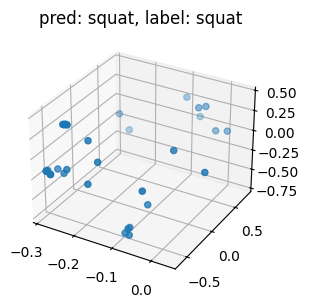

In [24]:
data = test_dataset.take(3)

points, labels = list(data)[1]
# print(points)
# print(labels)
points = points[:8]
# print(points)
labels = labels[:8]
print(labels)
labels = pd.DataFrame(labels.numpy()).idxmax(axis=1)
print(labels)

# run test data through model
preds = model.predict(points)
preds = tf.math.argmax(preds, -1) # retrieve class with highest probability
print(preds)
points = points.numpy()
print(class_map)

# plot points with predicted class and label
fig = plt.figure(figsize=(15,10))
for i in range(8):
    ax = fig.add_subplot(2,4,i+1, projection = "3d")
    ax.scatter(points[i,:,0], points[i,:,1],points[i,:,2])
    ax.set_title(
        "pred: {:}, label: {:}".format(
            class_map[preds[i].numpy()], class_map[labels[i]]
        ))
    plt.show()

In [26]:
import cv2
folder_path = "C:/Users/chengyang/Physio_2.0/archive_1/archive_1"
# Load an image
image = cv2.imread(folder_path + "/test/push up/push up_5000111.jpg")

# The image is now loaded and can be viewed using imshow
with mp_pose.Pose(static_image_mode=True, min_detection_confidence=0.5, model_complexity=1) as pose:
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image.flags.writeable = False
    results = pose.process(image)

    # Recolour back to BGR for rendering
    image.flags.writeable = True
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    
    landmarks_3d = results.pose_world_landmarks.landmark

    landmark_list = []
    for lm in np.arange(0,33):
        landmark_list.append([landmarks_3d[lm].x, landmarks_3d[lm].y,landmarks_3d[lm].z])
    print(landmark_list)
    preds = model.predict(tf.expand_dims(np.array(landmark_list), 0))
    preds = tf.math.argmax(preds, -1)[0].numpy()

    print(f"pred: {preds}")
    print(class_map[preds])
    # Display predictions on webcam image
    # cv2.putText(image, "pred: {:}".format(class_map[preds]),
    #     (50,70), # Change values in array based on webcam input resolution
    #     cv2.FONT_HERSHEY_SIMPLEX, 1, (255,0,0), 2, cv2.LINE_AA)

    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS,
        mp_drawing.DrawingSpec(color=(20,250,20), thickness=2, circle_radius=2),
        mp_drawing.DrawingSpec(color=(20,20,250), thickness=2, circle_radius=2))
    cv2.imshow('image', image)

cv2.waitKey(0)
cv2.destroyAllWindows()



[[-0.6808508038520813, 0.14656755328178406, 0.029006797820329666], [-0.7087971568107605, 0.13210034370422363, 0.005846832878887653], [-0.7090334296226501, 0.13173891603946686, 0.006365501321852207], [-0.7092694044113159, 0.1321074366569519, 0.006340427324175835], [-0.7081874012947083, 0.12884573638439178, 0.04040268436074257], [-0.7092646360397339, 0.12853652238845825, 0.03964024409651756], [-0.710465669631958, 0.12886948883533478, 0.04053828492760658], [-0.6648141145706177, 0.0457734540104866, -0.04684418439865112], [-0.6783978343009949, 0.03736092895269394, 0.09273476153612137], [-0.6459543108940125, 0.11309269815683365, 0.011763462796807289], [-0.6475500464439392, 0.11076341569423676, 0.052617039531469345], [-0.5073121190071106, 0.015708310529589653, -0.1442180573940277], [-0.47968485951423645, -0.011987986974418163, 0.19714537262916565], [-0.38666385412216187, 0.09886184334754944, -0.25817516446113586], [-0.333770751953125, 0.04488660395145416, 0.311556875705719], [-0.4369264543056

In [37]:
cap = cv2.VideoCapture(0)

with mp_pose.Pose(min_detection_confidence=0.8, min_tracking_confidence=0.7, model_complexity = 0) as pose:
    while cap.isOpened():
        ret, frame = cap.read()

        # Recolour image to RGB
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False

        # Make Detection
        results = pose.process(image)

        image.flags.writeable = True
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        not_visible = False
        # Extraction of landmarks
        try:
            landmarks_3d = results.pose_world_landmarks.landmark
            landmark_list = []
            for lm in np.arange(0,33):
                landmark_list.append([landmarks_3d[lm].x, landmarks_3d[lm].y,landmarks_3d[lm].z])
                if landmarks_3d[lm].visibility < 0.5:
                    not_visible = True
                    break
            print(landmark_list)

            if not_visible:
                predicted_class = "not visible"
            else:
                preds = model.predict(tf.expand_dims(np.array(landmark_list), 0))
                preds = tf.math.argmax(preds, -1)[0].numpy()
                predicted_class = class_map[preds]
                print(f"pred: {preds}")
                print(class_map[preds])
            # Display predictions on webcam image
            cv2.putText(image, "pred: {:}".format(predicted_class),
                (50,70), # Change values in array based on webcam input resolution
                cv2.FONT_HERSHEY_SIMPLEX, 1, (255,0,0), 2, cv2.LINE_AA)
        except:
            pass

        # Render detections
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS,
        mp_drawing.DrawingSpec(color=(20,250,20), thickness=2, circle_radius=2),
        mp_drawing.DrawingSpec(color=(20,20,250), thickness=2, circle_radius=2))

        cv2.imshow("Webcam Feed", image)

        # Press q to end stream
        if cv2.waitKey(10) & 0xFF == ord("q"):
            break

cap.release()
cv2.destroyAllWindows()

[[0.02706315740942955, -0.5695909261703491, -0.33466479182243347], [0.03237564116716385, -0.6063129901885986, -0.3221755921840668], [0.03183852136135101, -0.6058627963066101, -0.3241948187351227], [0.03200392425060272, -0.6060534119606018, -0.32163915038108826], [-0.0008050119504332542, -0.6057859063148499, -0.331734836101532], [0.0010219113901257515, -0.6064287424087524, -0.33098509907722473], [0.00013118423521518707, -0.6053445339202881, -0.32782256603240967], [0.0759541466832161, -0.5981730818748474, -0.21133360266685486], [-0.072037473320961, -0.5903371572494507, -0.2276638299226761], [0.03710751235485077, -0.5451731085777283, -0.2998047173023224], [-0.004131826106458902, -0.5405983328819275, -0.30432984232902527], [0.16586564481258392, -0.4322563409805298, -0.13756340742111206], [-0.1678311824798584, -0.41641491651535034, -0.20236679911613464], [0.19879578053951263, -0.2474536895751953, -0.08742594718933105], [-0.27662357687950134, -0.2413538545370102, -0.1883244514465332], [0.202